# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [3]:
# Load data
df = pd.read_csv("data/cars.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [4]:
df.shape

(11914, 15)

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [5]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated().sum()

720

In [6]:
#  2. Modify our df to have all duplicate rows removed. 

df = df.drop_duplicates()
df.shape

(11194, 15)

In [7]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()


0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [8]:
# * Which column has the most null values and how many null values does it have?

df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

Engine HP has the most null values, with 69 null values

In [9]:
# * Print how long our dataframe is.
len(df)


11194

In [10]:
# * Remove any row that has a null value in it. 
df = df.dropna()


In [11]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
len(df)


11092

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

In [14]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
makes = df['Make'].value_counts()


<Axes: >

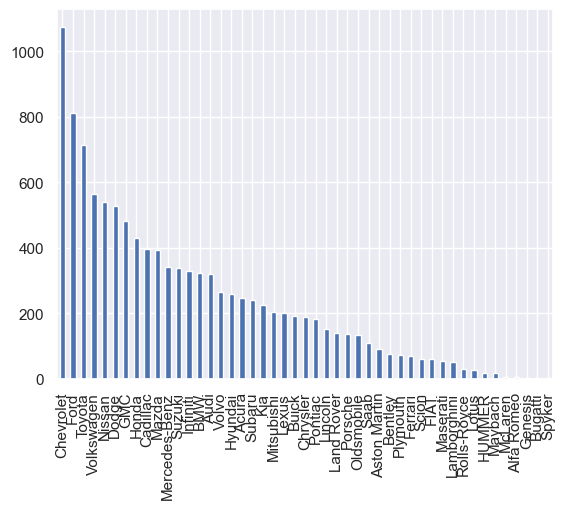

In [18]:
makes.plot(kind="bar")

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<Axes: >

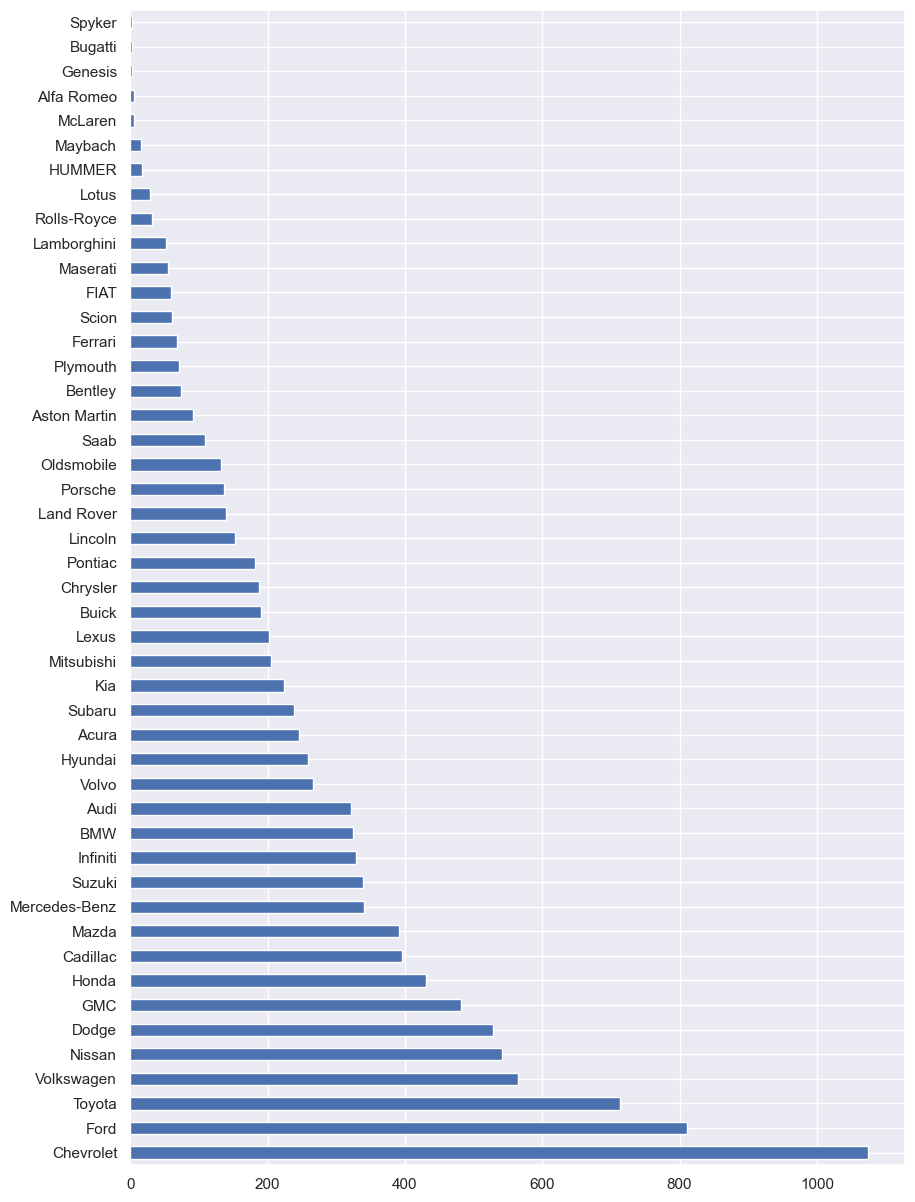

In [24]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
makes.plot(kind="barh", figsize=(10,15))

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


<Axes: xlabel='Year'>

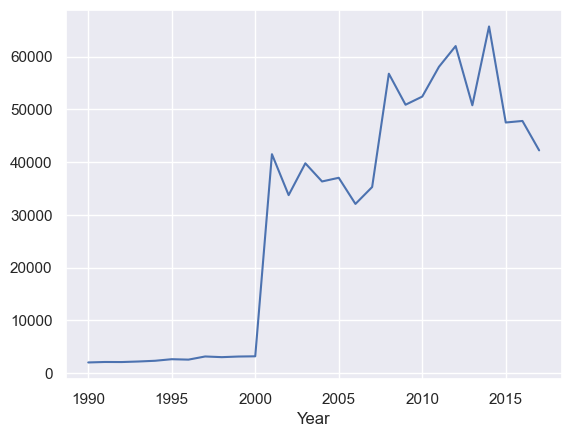

In [37]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
msrp_per_year = df.groupby("Year")["MSRP"].mean()
msrp_per_year.plot(kind="line")

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [43]:
# Make a column where is 10 when year is less than 2000, else 1.

df['adjusted_price'] = np.where(df['Year']<=2000,df['MSRP']*10,df['MSRP'])
# Multiply the MSRP by the price adjuster.



# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<Axes: xlabel='Year'>

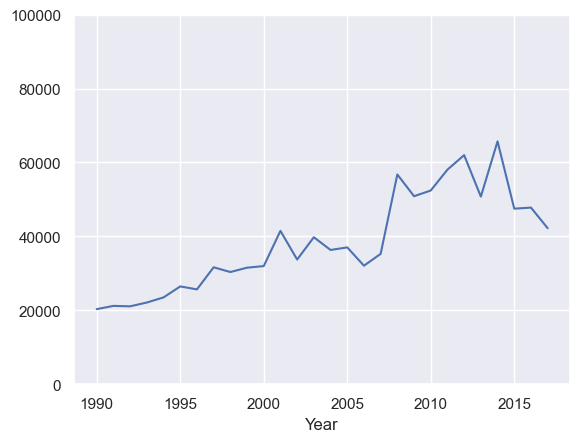

In [47]:
# Plot new prices
adj_msrp_per_year = df.groupby("Year")["adjusted_price"].mean()
adj_msrp_per_year.plot(kind="line",
                       ylim=(0,100000))


# Plot the relationship between Engine HP and highway MPG

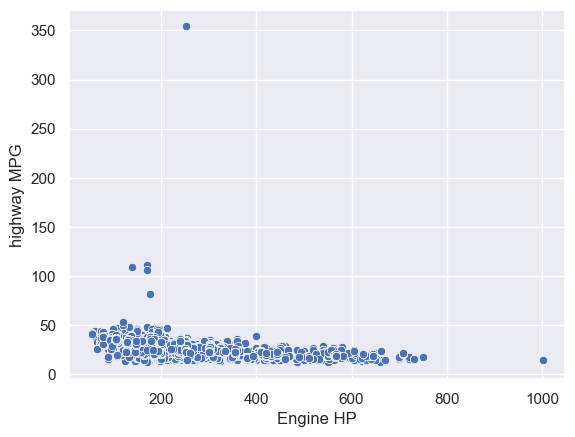

In [64]:
# Plot the relationship between Engine HP and highway MPG

ax = sns.scatterplot(
    data=df,
    x='Engine HP',
    y='highway MPG'
)

In [59]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 

#just assuming that one pointis an outlier, no math done
select_condition = df['highway MPG'] < 300
df_cleaned = df[select_condition]

# Replot the relationship between Engine HP and highway MPG


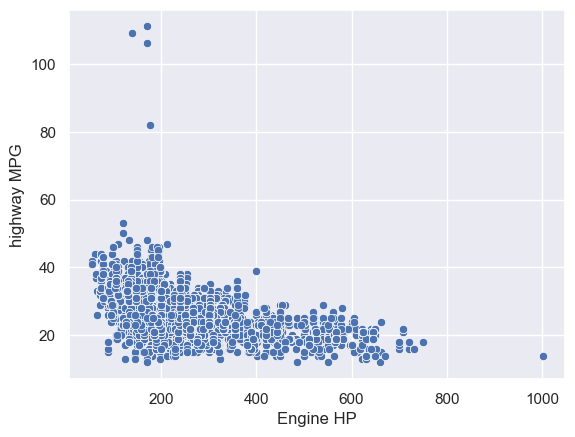

In [61]:
# Re-Plot the relationship between Engine HP and highway MPG
ax = sns.scatterplot(
    data=df_cleaned,
    x='Engine HP',
    y='highway MPG'
)

# Make a scatter plot of Engine HP vs highway MPG

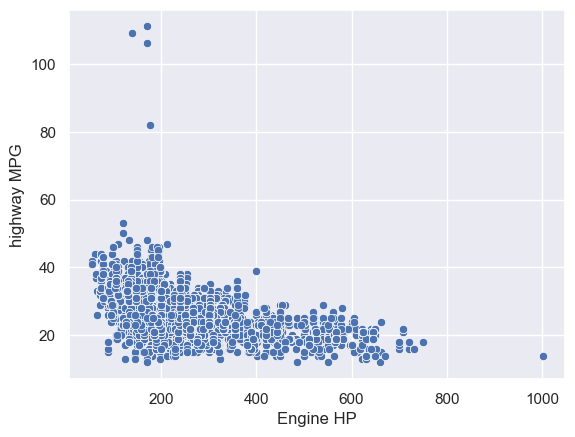

In [65]:
# Make a scatter plot of Engine HP vs highway MPG

#same thing??
ax = sns.scatterplot(
    data=df_cleaned,
    x='Engine HP',
    y='highway MPG'
)

# What does this plot tell you about how Engine HP affects highway MPG?

In [66]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('There appears to be a downward trend of increasing Engine HP leading to lower highway MPG')

There appears to be a downward trend of increasing Engine HP leading to lower highway MPG


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

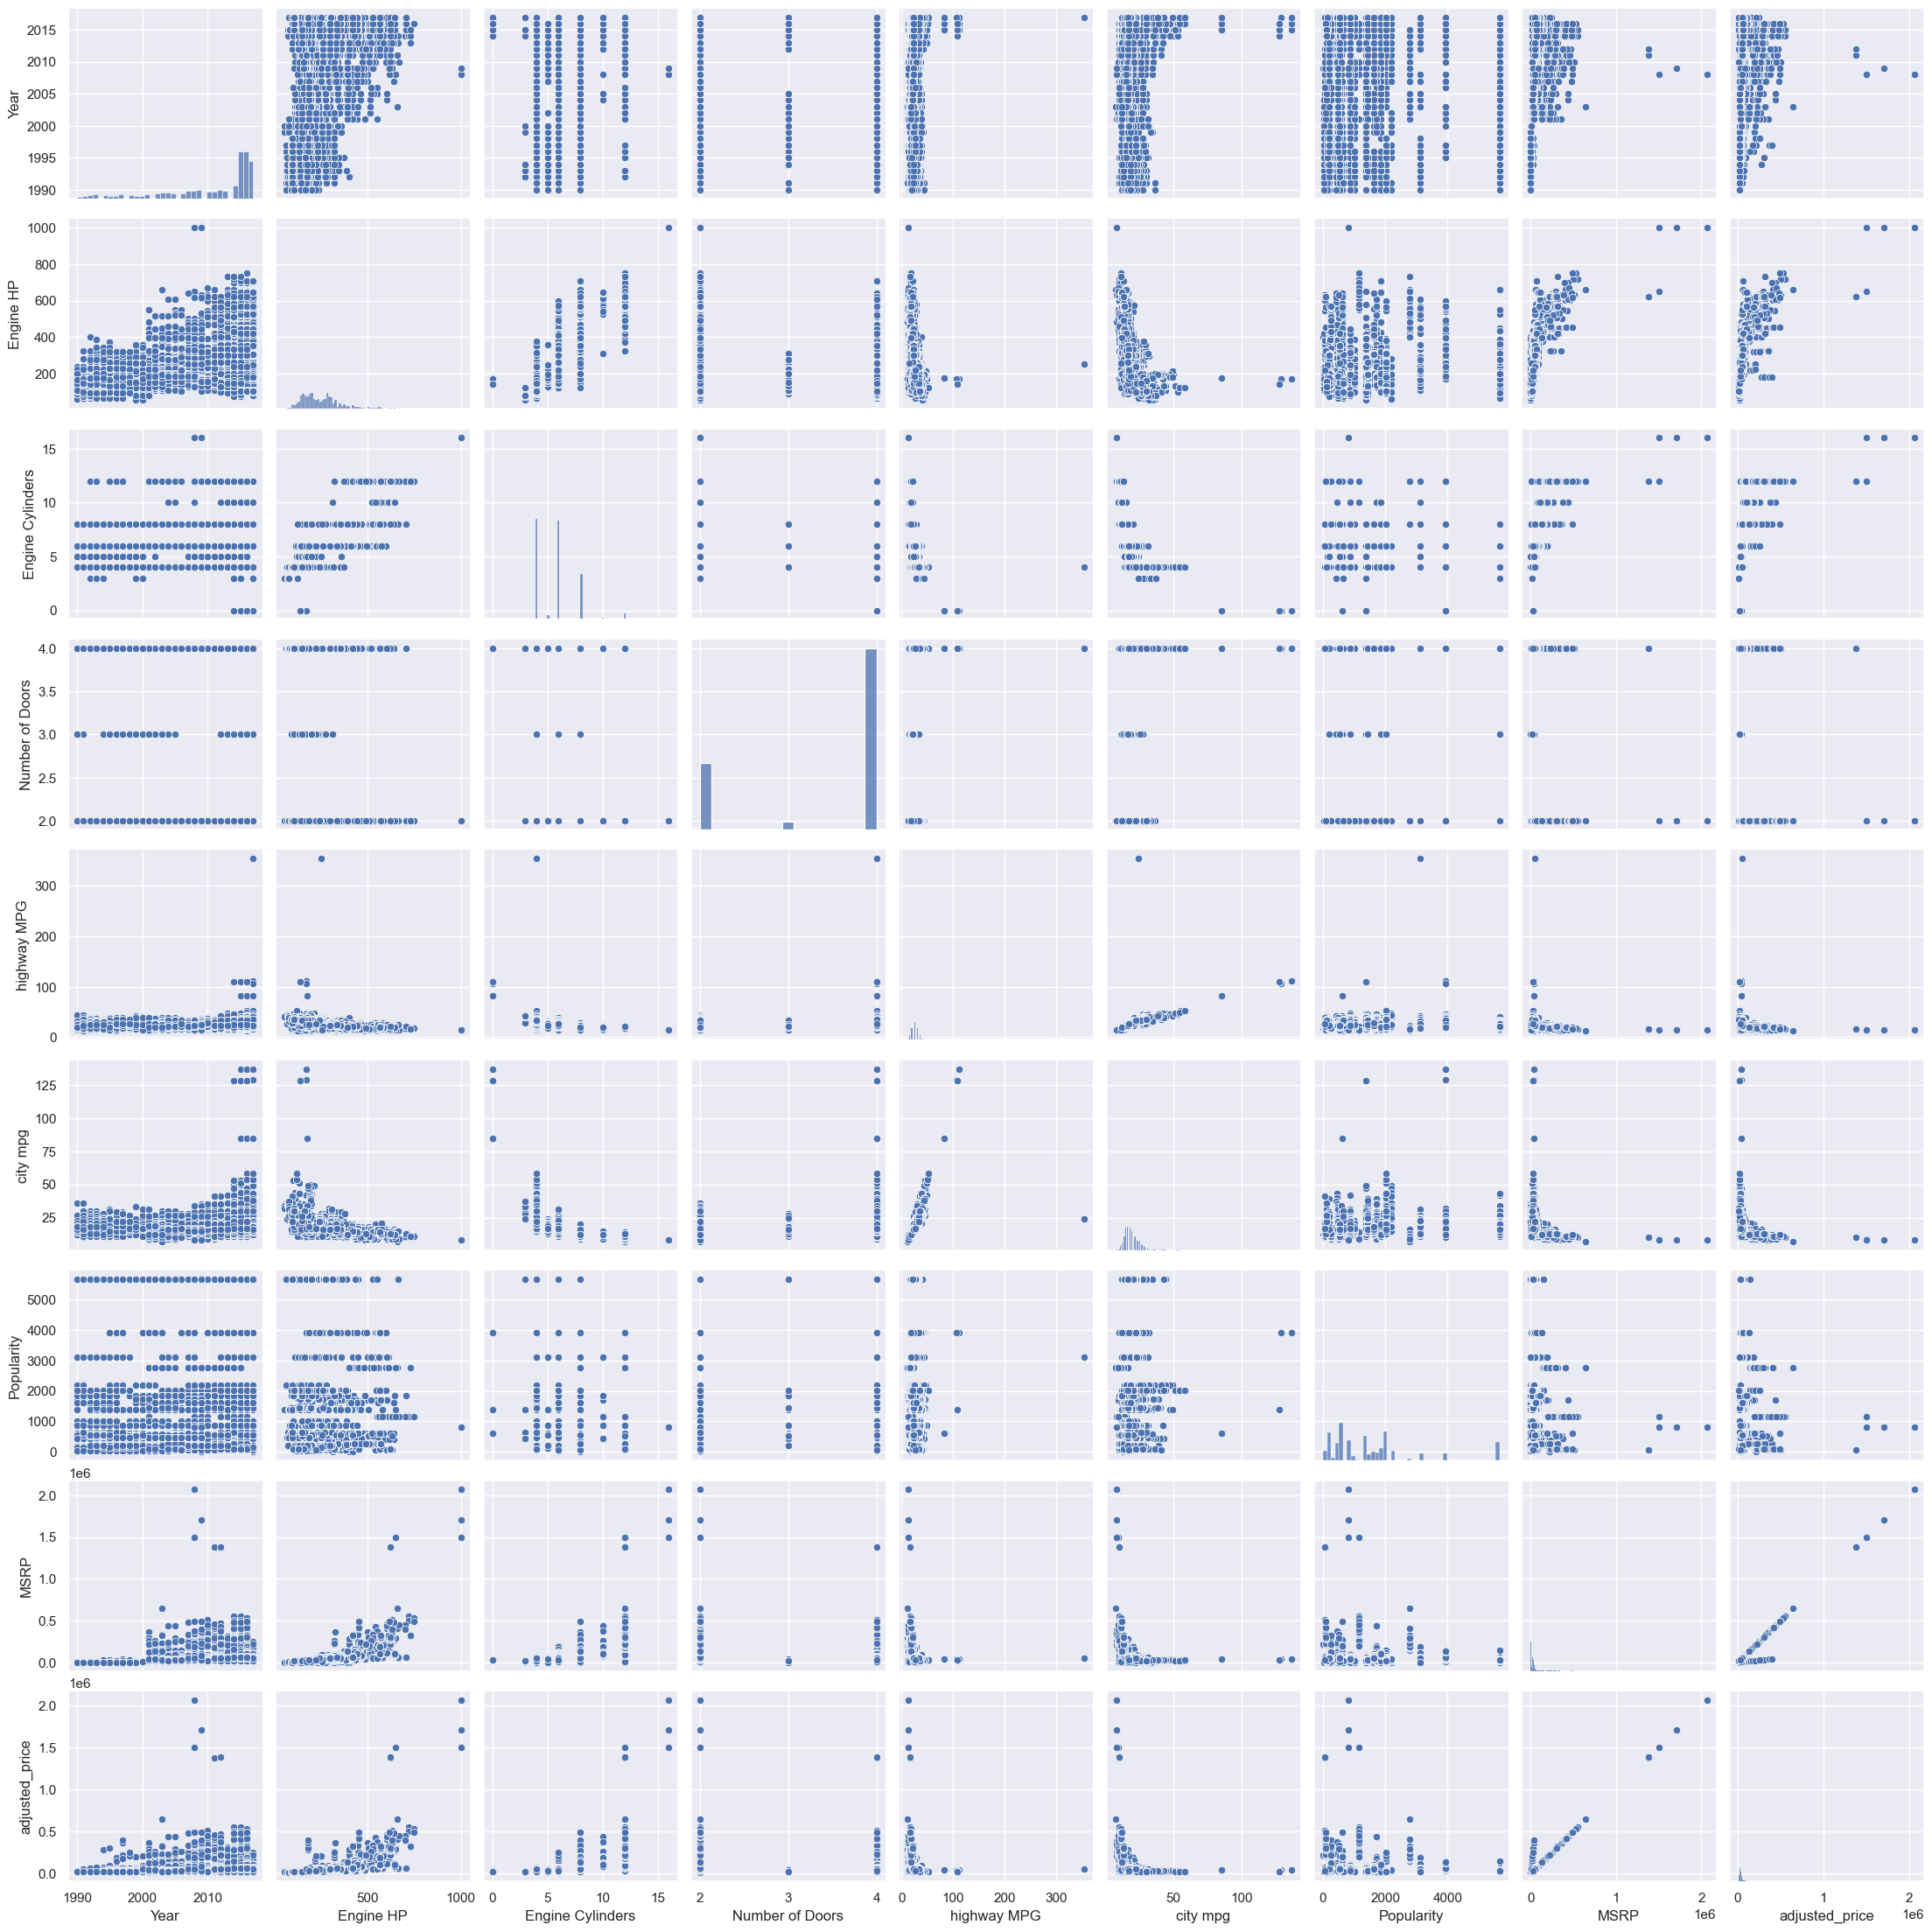

In [67]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df);

In [69]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print("At a glance, it looks like city mpg and highway mpg have the strongest linear relationship")


At a glance, it looks like city mpg and highway mpg have the strongest linear relationship


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

C:\Users\uddin\AppData\Local\Temp\ipykernel_20216\1287667103.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

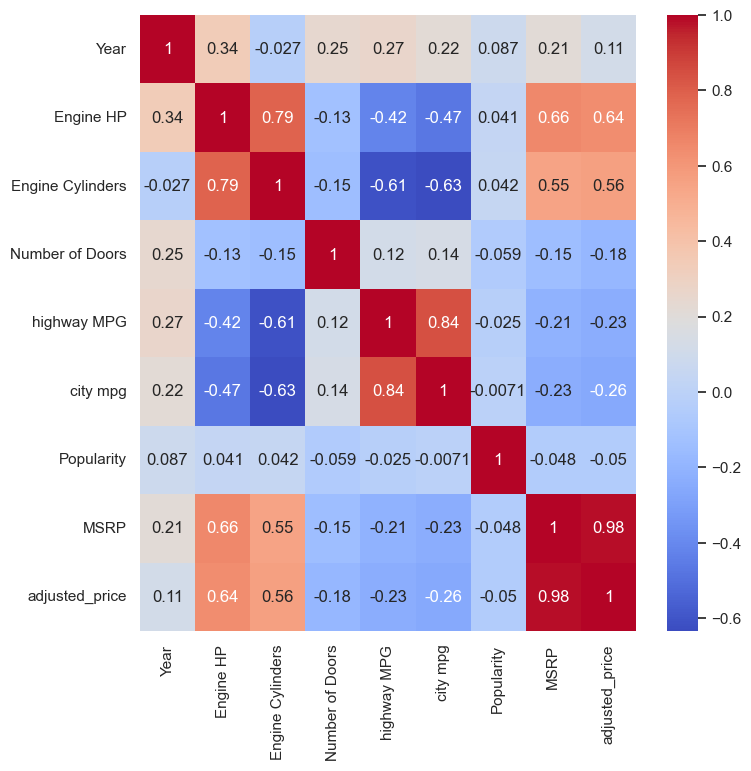

In [73]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8, 8))

sns.heatmap(df.corr(),
            annot=True, 
            cmap='coolwarm')

In [74]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has the strongest relationship with Engine cylinders, probably because more cylinders means more horsepower')

Engine HP has the strongest relationship with Engine cylinders, probably because more cylinders means more horsepower


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




(EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

In [79]:
old_names = df.columns.tolist()

In [80]:
new_names = {name : name.lower().replace(" ","_") for name in old_names}

In [81]:
new_names

{'Make': 'make',
 'Model': 'model',
 'Year': 'year',
 'Engine Fuel Type': 'engine_fuel_type',
 'Engine HP': 'engine_hp',
 'Engine Cylinders': 'engine_cylinders',
 'Transmission Type': 'transmission_type',
 'Driven_Wheels': 'driven_wheels',
 'Number of Doors': 'number_of_doors',
 'Vehicle Size': 'vehicle_size',
 'Vehicle Style': 'vehicle_style',
 'highway MPG': 'highway_mpg',
 'city mpg': 'city_mpg',
 'Popularity': 'popularity',
 'MSRP': 'msrp',
 'adjusted_price': 'adjusted_price'}

In [84]:
df.rename(columns=new_names).head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
